[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/images_metadata_matcher/)

<img src='__docs/__all/notebook_rules.png' />

# Select your IPTS

In [1]:
from __code.select_files_and_folders import SelectAsciiFile, SelectFolder
from __code.images_and_metadata_extrapolation_matcher import ImagesAndMetadataExtrapolationMatcher

# from __code import system
# system.System.select_working_dir()
# from __code.__all import custom_style
# custom_style.style()

** Using Debugging Mode! **


# Select the File Name vs Time Stamp ASCII File

This file created by running [create_list_of_file_name_vs_time_stamp](create_list_of_file_name_vs_time_stamp.ipynb) notebook!

In [1]:
#o_select_ascii1 = SelectAsciiFile(system=system)

# Select Metadata vs Time Stamp ASCII File 

File creatd by either

- [metadata_ascii_parser](metadata_ascii_parser.ipynb)

**or/and**

- [list_metadata_and_time_with_oncat](list_metadata_and_time_with_oncat.ipynb)

In [2]:
#o_select_ascii2 = SelectAsciiFile(system=system)

# Merging 

In [4]:
# o_matcher = ImagesAndMetadataExtrapolationMatcher(filename_vs_timestamp=o_select_ascii1.ascii_file,
#                                                   metadata_ascii_file=o_select_ascii2.ascii_file)

# Select Output Folder 

In [3]:
#o_folder = SelectFolder(system=system, next_function=o_matcher.export_ascii)

# DEBUGGING 

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import time
import datetime

import pandas as pd
from __code import time_utility

from __code.images_and_metadata_extrapolation_matcher import ImagesAndMetadataExtrapolationMatcher

In [2]:
ascii1 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/images_timestamp_infos.txt'
ascii2 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/Sep_17_metadata_report_from_oncat.txt'
ascii3 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/A49_3_at80C_4p1mm_120s_2_03_OCV_C03_2columns.txt'

In [5]:
o_matcher = ImagesAndMetadataExtrapolationMatcher(ascii_file_1=ascii1, ascii_file_2=ascii2)
print(o_matcher.ascii_file_2_dataframe)

                                           #filename  \
0  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
1  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
2  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
3  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
4  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
5  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
6  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
7  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   
8  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...   

               timestamp_user_format  MotCameraVert  MotCameraVert_RBV  \
0   2018-09-17T21:50:50.978000-04:00     -51.699796         -51.699796   
1   2018-09-17T14:10:56.662000-04:00     -51.699796         -51.699796   
2   2018-09-17T22:50:55.203000-04:00     -51.699796         -51.699796   
3   2018-09-17T22:50:56.283000-04:00     -51.699796         -51.699796   
4   2018-09-17T18:50:58.244000-04:00     -51.699796         -51.69979

In [23]:
_dataframe3 = pd.read_csv(ascii3)
_dataframe3.set_index('time_user_format')
# format time_user_format
time_user_format = list(_dataframe3['time_user_format'])

o_time = time_utility.TimestampFormatter(timestamp=time_user_format)
new_time_user_format = o_time.format()
_dataframe3['time_user_format'] = new_time_user_format

print(_dataframe3)


    Unnamed: 0     TimeStamp  Voltage     time_user_format
0            0  1.536357e+09        1  2018-09-18 00:10:35
1            1  1.536357e+09        2  2018-09-18 00:10:45
2            2  1.536357e+09        3  2018-09-18 00:12:40
3            3  1.536357e+09        4  2018-09-18 00:13:00
4            4  1.536357e+09        5  2018-09-18 00:13:09
5            5  1.536357e+09        6  2018-09-18 00:13:14
6            6  1.536357e+09        7  2018-09-18 00:13:20
7            7  1.536357e+09        8  2018-09-18 00:13:22
8            8  1.536357e+09        9  2018-09-18 00:13:40
9            9  1.536357e+09       10  2018-09-18 00:13:50
10          10  1.536357e+09       11  2018-09-18 00:14:06
11          11  1.536357e+09       12  2018-09-18 00:14:15
12          12  1.536357e+09       13  2018-09-18 00:14:28


In [98]:
def get_seconds(time_string, time_format='%m/%d/%Y %I:%M:%S'):
    # time_string = 09/18/2018 12:00:35
    x = time.strptime(time_string.strip(), time_format)
    return datetime.timedelta(hours=x.tm_hour, minutes=x.tm_min, seconds=x.tm_sec).total_seconds()

Metadata from Regina's data set retrieve

In [99]:
_dataframe3 = pd.read_csv(ascii3)
#_dataframe.set_index(INDEX)
_dataframe3

time_column = np.asarray(_dataframe3['time_user_format'])
data_column_ascii1 = np.asarray(_dataframe3['Voltage'])
#time_column
time_column_ascii1 = [get_seconds(_time) for _time in time_column]



TypeError: tuple indices must be integers or slices, not str

Data coming from file_name vs time stamp

In [39]:
_dataframe1 = pd.read_csv(ascii1)
#_dataframe.set_index(INDEX)
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:07,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:05,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:29,116.0


In [6]:
time_column = np.asarray(_dataframe1[' timestamp_user_format'])
time_column_s = [get_seconds(_time, time_format="%Y-%m-%d %I:%M:%S") for _time in time_column]

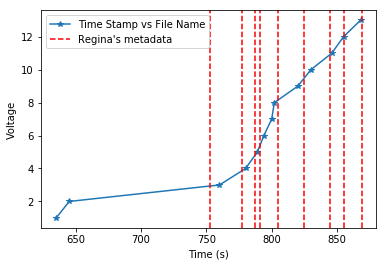

In [62]:
fig, ax = plt.subplots()
ax.plot(time_column_ascii1, data_column_ascii1, '*-', label='Time Stamp vs File Name')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage")

for _vl in time_column_s[1:]:
    ax.axvline(x=_vl, color='r', linestyle='--')

ax.axvline(x=time_column_s[0], color='r', linestyle='--', label="Regina's metadata")

ax.legend()


Checking the conversion of time/date units

In [60]:
format1 = "2018-09-18 12:12:7"
format1_reader = "%Y-%m-%d %I:%M:%S"
format2 = "09/18/2018 12:10:35"
format2_reader = "%m/%d/%Y %I:%M:%S"

In [96]:
a="dfdfdf"
type(a) is list

False

In [82]:
global_format = time.strptime(format1.strip(), format1_reader)

new_format = "{}/{}/{} {}:{}:{:}".format(global_format.tm_year,
                                        global_format.tm_mon,
                                        global_format.tm_mday,
                                        global_format.tm_hour,
                                        global_format.tm_min,
                                        global_format.tm_sec)
print("{} -> {}".format(format1, new_format))

2018-09-18 12:12:7 -> 2018/9/18 0:12:7


In [83]:
# global_format = time.strptime(format2.strip(), format2_reader)

# new_format = "{}/{}/{} {}:{}:{}".format(global_format.tm_year,
#                                         global_format.tm_mon,
#                                         global_format.tm_mday,
#                                         global_format.tm_hour,
#                                         global_format.tm_min,
#                                         global_format.tm_sec)
# print("{} -> {}".format(format2, new_format))

In [84]:
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:7,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:5,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:29,116.0


In [85]:
def format_time(old_format):
    global_format = time.strptime(old_format.strip(), format1_reader)
    new_format = "{}/{}/{} {}:{}:{:02d}".format(global_format.tm_year,
                                        global_format.tm_mon,
                                        global_format.tm_mday,
                                        global_format.tm_hour,
                                        global_format.tm_min,
                                        global_format.tm_sec)
    return new_format

In [86]:
data1_dt = _dataframe1[' timestamp_user_format']
data1_dt

0    2018/9/18 0:12:33
1    2018/9/18 0:12:57
2     2018/9/18 0:13:7
3    2018/9/18 0:13:11
4    2018/9/18 0:13:25
5    2018/9/18 0:13:45
6     2018/9/18 0:14:5
7    2018/9/18 0:14:15
8    2018/9/18 0:14:29
Name:  timestamp_user_format, dtype: object

In [89]:
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:7,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:5,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:29,116.0


In [87]:
for _index, _date in enumerate(data1_dt):
    new_format = format_time(_date)
    data1_dt[_index] = new_format

ValueError: time data '2018/9/18 0:12:33' does not match format '%Y-%m-%d %I:%M:%S'

In [88]:
data1_dt

0    2018/9/18 0:12:33
1    2018/9/18 0:12:57
2     2018/9/18 0:13:7
3    2018/9/18 0:13:11
4    2018/9/18 0:13:25
5    2018/9/18 0:13:45
6     2018/9/18 0:14:5
7    2018/9/18 0:14:15
8    2018/9/18 0:14:29
Name:  timestamp_user_format, dtype: object

In [91]:
if "##filename" in _dataframe:
    print("yes")

In [8]:
o_matcher = ImagesAndMetadataExtrapolationMatcher(filename_vs_timestamp=ascii1,
                                                  metadata_ascii_file=ascii2)

output file

In [5]:
o_folder = SelectFolder(system=system, next_function=o_matcher.export_ascii)

In [6]:
import pandas as pd

In [7]:
pd_ascii1 = pd.read_csv(ascii1)
pd_ascii2 = pd.read_csv(ascii2)

In [44]:
pd_ascii1.set_index("#filename")

,timestamp(s),timestamp_user_format,timeoffset(s)
#filename,,,
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_5.tiff,1.537287e+09,2018-09-18 12:12:33,0.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_12.tiff,1.537287e+09,2018-09-18 12:12:57,24.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_8.tiff,1.537287e+09,2018-09-18 12:13:07,34.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_11.tiff,1.537287e+09,2018-09-18 12:13:11,38.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_9.tiff,1.537287e+09,2018-09-18 12:13:25,52.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_13.tiff,1.537287e+09,2018-09-18 12:13:45,72.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_7.tiff,1.537287e+09,2018-09-18 12:14:05,92.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_6.tiff,1.537287e+09,2018-09-18 12:14:15,102.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_10.tiff,1.537287e+09,2018-09-18 12:14:29,116.0


In [45]:
pd_ascii2.set_index("#filename")

,timestamp,MotCameraVert,MotCameraVert_RBV,MotDetTable,MotDetTable_RBV
#filename,,,,,
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_5.tiff,2018-09-17T21:50:50.978000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_12.tiff,2018-09-17T14:10:56.662000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_8.tiff,2018-09-17T22:50:55.203000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_11.tiff,2018-09-17T22:50:56.283000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_9.tiff,2018-09-17T18:50:58.244000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_13.tiff,2018-09-17T15:41:00.793000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_7.tiff,2018-09-17T20:50:52.539000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_6.tiff,2018-09-17T16:40:57.966000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_10.tiff,2018-09-17T15:00:55.624000-04:00,-51.699796,-51.699796,200.0,200.0


In [95]:
merging_ascii = pd.merge(pd_ascii1, pd_ascii2, on='#filename', how='outer')
merging_ascii

,#filename,timestamp(s),timestamp_user_format,timeoffset(s),timestamp,MotCameraVert,MotCameraVert_RBV,MotDetTable,MotDetTable_RBV
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:33,0.0,2018-09-17T21:50:50.978000-04:00,-51.699796,-51.699796,200.0,200.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:57,24.0,2018-09-17T14:10:56.662000-04:00,-51.699796,-51.699796,200.0,200.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:07,34.0,2018-09-17T22:50:55.203000-04:00,-51.699796,-51.699796,200.0,200.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:11,38.0,2018-09-17T22:50:56.283000-04:00,-51.699796,-51.699796,200.0,200.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:25,52.0,2018-09-17T18:50:58.244000-04:00,-51.699796,-51.699796,200.0,200.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:45,72.0,2018-09-17T15:41:00.793000-04:00,-51.699796,-51.699796,200.0,200.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:05,92.0,2018-09-17T20:50:52.539000-04:00,-51.699796,-51.699796,200.0,200.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:15,102.0,2018-09-17T16:40:57.966000-04:00,-51.699796,-51.699796,200.0,200.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:29,116.0,2018-09-17T15:00:55.624000-04:00,-51.699796,-51.699796,200.0,200.0


In [1]:
timestamp1 = "2018-09-18 12:13:14"
timestamp2 = "2018/09/18 12:13:14"
timestamp3 = "18/09/2018 12:13:14"


In [3]:
o_time = time_utility.TimestampFormatter(timestamp=timestamp3)

In [4]:
o_time.format()

timestamp: 18/09/2018 12:13:14
input_time_format: %m/%d/%Y %I:%M:%S
timestamp: 18/09/2018 12:13:14
input_time_format: %Y-%m-%d %I:%M:%S
timestamp: 18/09/2018 12:13:14
input_time_format: %d/%m/%Y %I:%M:%S
time_dict: time.struct_time(tm_year=2018, tm_mon=9, tm_mday=18, tm_hour=0, tm_min=13, tm_sec=14, tm_wday=1, tm_yday=261, tm_isdst=-1)



'2018-09-18 00:13:14'

# Select Metadata Info to Keep 

**Allow users to define:**

 * reference_line_showing_end_of_metadata
 * start_of_data_after_how_many_lines_from_reference_line
 * index or label of time info column in big table

In [ ]:
o_meta = MetadataFileParser(filename=o_file.metadata_file, 
                            meta_type='mpt',
                            time_label='time/s',
                            reference_line_showing_end_of_metadata='Number of loops',
                            end_of_metadata_after_how_many_lines_from_reference_line=1)
o_meta.parse()

o_meta.select_data_to_keep()

# Select Output Folder and Filename of new Formated Metadata File

In [ ]:
o_meta.keep_only_columns_of_data_of_interest()
o_meta.select_output_location()

# Where to go Next 

Now, you probably want to run [this metadata_ascii_parser](./metadata_ascii_parser.ipynb) notebook in order to create a list of file names and their exact metadata values.